In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [20]:
df.shape

(49068, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [22]:
df.rename(columns={'Province/State':'state','Country/Region':'country'},inplace=True)

In [23]:
confirmed = df.groupby(by = 'Date')['Confirmed'].sum().reset_index()

In [24]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


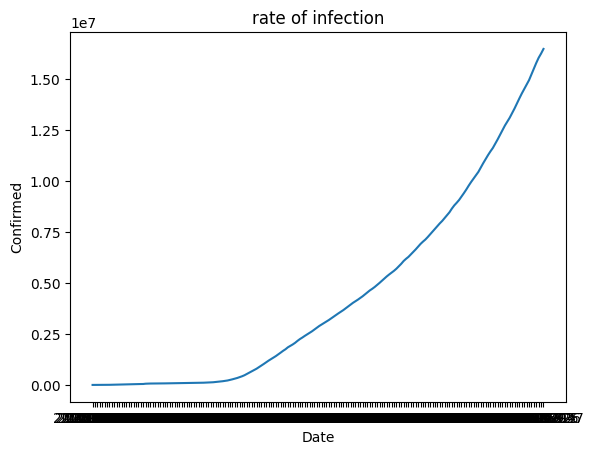

In [25]:
plt.plot(confirmed['Date'],confirmed['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.title('rate of infection')
plt.show()

In [26]:
confirmed.columns = ['ds','y']
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [27]:
recovery = df.groupby(by = 'Date')['Recovered'].sum().reset_index()

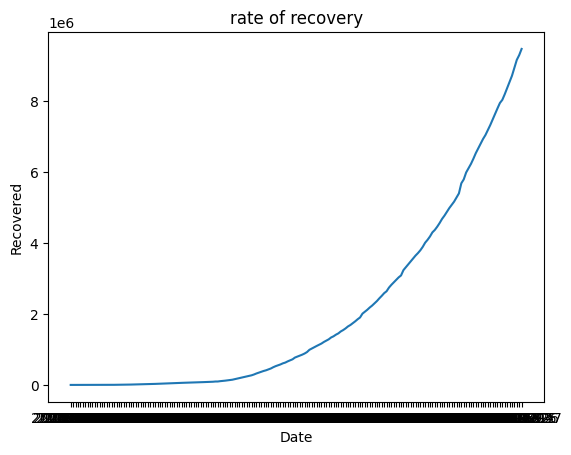

In [32]:
plt.plot(recovery['Date'],recovery['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered')
plt.title('rate of recovery')
plt.show()

In [28]:
from prophet import Prophet

m = Prophet()
m.fit(confirmed)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk8aq7kj_/jznpfj4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk8aq7kj_/lz_1kjev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51785', 'data', 'file=/tmp/tmpk8aq7kj_/jznpfj4t.json', 'init=/tmp/tmpk8aq7kj_/lz_1kjev.json', 'output', 'file=/tmp/tmpk8aq7kj_/prophet_model349zupw_/prophet_model-20251026052419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods=7)
forecast= m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.239644e+05,8.083095e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.098959e+05,9.167651e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.004090e+05,1.162318e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.619569e+04,1.241795e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.679419e+04,1.117118e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663053e+07,1.684556e+07,1.673878e+07,1.674983e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684894e+07,1.706641e+07,1.693723e+07,1.695874e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705514e+07,1.728061e+07,1.713266e+07,1.716899e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724893e+07,1.747708e+07,1.732839e+07,1.737954e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [30]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.239644e+05,8.083095e+04
1,2020-01-23,-8.050948e+03,-1.098959e+05,9.167651e+04
2,2020-01-24,5.827455e+03,-1.004090e+05,1.162318e+05
3,2020-01-25,1.217668e+04,-9.619569e+04,1.241795e+05
4,2020-01-26,8.405020e+03,-9.679419e+04,1.117118e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.663053e+07,1.684556e+07
191,2020-07-31,1.695910e+07,1.684894e+07,1.706641e+07
192,2020-08-01,1.716676e+07,1.705514e+07,1.728061e+07
193,2020-08-02,1.736430e+07,1.724893e+07,1.747708e+07


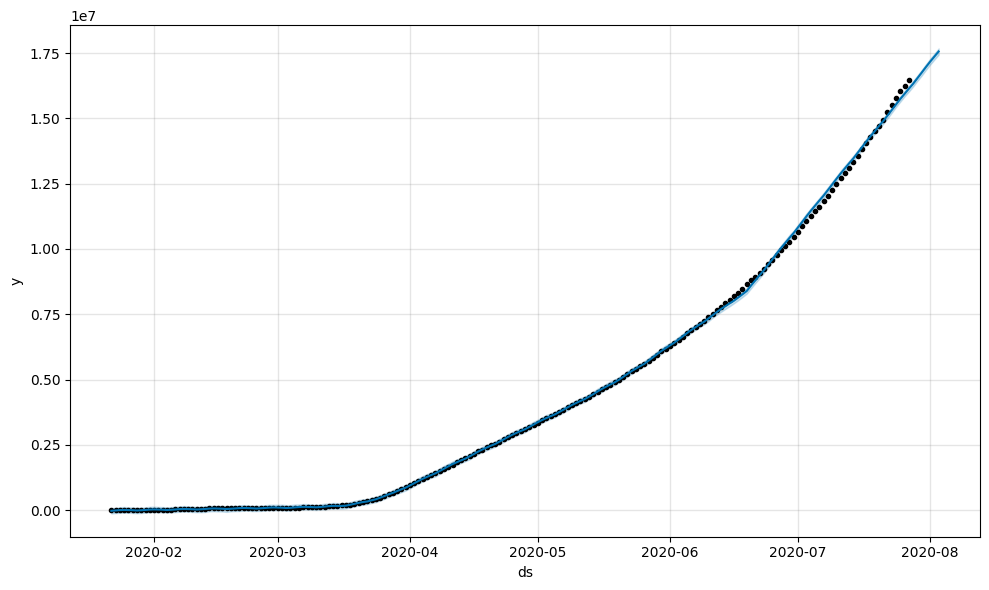

In [31]:
m.plot(forecast)
plt.show()